In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [5]:
from fbprophet import Prophet
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import os

In [6]:
path = os.path.join('./Data', 'AirPassengers.csv')

data = pd.read_csv(path)
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## For prophet Time should always be 'ds' and value should be 'y'

In [7]:
data.columns = ['ds', 'y']
data

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
data.isnull().values.any()

False

### Data Clean
Since no null calues are there in the dataset, we dont have to clean the Na values through the dataset.

In [10]:
data.dtypes

ds    object
y      int64
dtype: object

<AxesSubplot:xlabel='ds'>

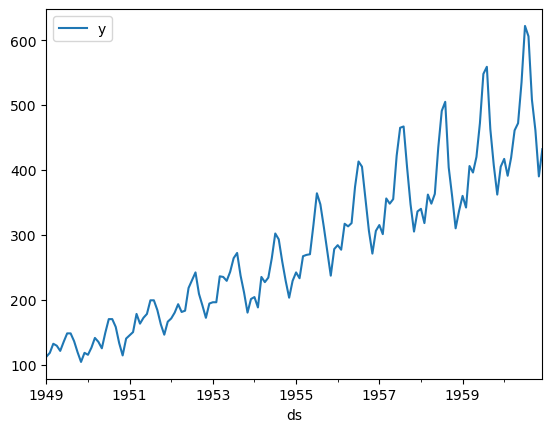

In [11]:
## changing the ds "date type" to datetime format

data['ds'] = pd.to_datetime(data.ds)
data.plot(x = 'ds', y ='y')

## Split data for train and test

In [13]:
len(data)

144

In [31]:
train = data[:120]
test = data[120:]

In [32]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.56207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


      99       404.153      0.007688       99.9614           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       405.972   0.000266286       139.911   3.372e-06       0.001      261  LS failed, Hessian reset 
     199       406.008   0.000287055       85.6152           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       406.058   0.000307063       69.6712           1           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     385       406.802   9.64327e-05       87.9484   1.267e-06       0.001      563  LS failed, Hessian reset 
     399       406.807    1.0426e-05       83.2223       0.934       0.934      584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     456       406.811   4.27682e-09       81.6902      0.2318

In [48]:
future=m.make_future_dataframe(periods=30,freq='MS')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,116.377849,93.056214,115.776595,116.377849,116.377849,-0.098734,-0.098734,-0.098734,-0.098734,-0.098734,-0.098734,0.0,0.0,0.0,104.887385
1,1949-02-01,117.993020,89.403896,111.584930,117.993020,117.993020,-0.145046,-0.145046,-0.145046,-0.145046,-0.145046,-0.145046,0.0,0.0,0.0,100.878584
2,1949-03-01,119.451885,108.554093,131.955754,119.451885,119.451885,0.004482,0.004482,0.004482,0.004482,0.004482,0.004482,0.0,0.0,0.0,119.987242
3,1949-04-01,121.067056,105.918292,130.192071,121.067056,121.067056,-0.031543,-0.031543,-0.031543,-0.031543,-0.031543,-0.031543,0.0,0.0,0.0,117.248256
4,1949-05-01,122.630125,107.353110,130.632242,122.630125,122.630125,-0.028200,-0.028200,-0.028200,-0.028200,-0.028200,-0.028200,0.0,0.0,0.0,119.171964


In [49]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
145,1961-02-01,464.128742,383.548435,409.717577,456.574467,471.994945,-0.145046,-0.145046,-0.145046,-0.145046,-0.145046,-0.145046,0.0,0.0,0.0,396.808643
146,1961-03-01,466.273988,453.801544,483.670159,458.302736,474.540061,0.004482,0.004482,0.004482,0.004482,0.004482,0.004482,0.0,0.0,0.0,468.363726
147,1961-04-01,468.649082,439.484985,468.145441,460.189281,477.372229,-0.031543,-0.031543,-0.031543,-0.031543,-0.031543,-0.031543,0.0,0.0,0.0,453.866556
148,1961-05-01,470.947561,443.669271,472.810666,461.858735,480.064612,-0.028200,-0.028200,-0.028200,-0.028200,-0.028200,-0.028200,0.0,0.0,0.0,457.666874
149,1961-06-01,473.322655,516.393912,547.337258,463.831898,482.998080,0.123738,0.123738,0.123738,0.123738,0.123738,0.123738,0.0,0.0,0.0,531.890514


    yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
    yhat_lower: the lower bound of our forecasts
    yhat_upper: the upper bound of our forecasts

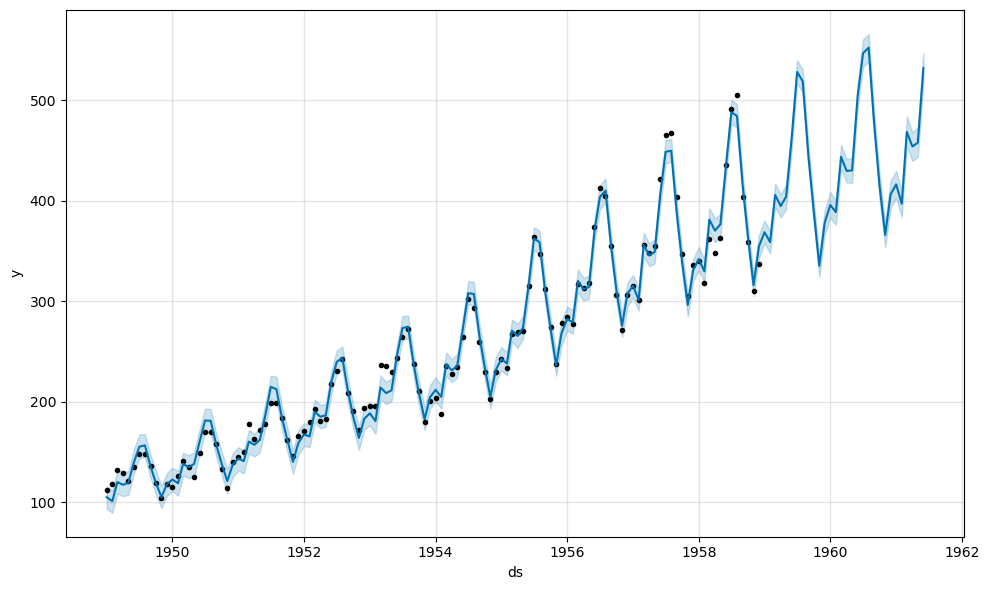

In [50]:
import matplotlib.pyplot as plt
m.plot(forecast, uncertainty = True) 
plt.show()
#plot1 = m.plot(forecast)

<AxesSubplot:xlabel='ds'>

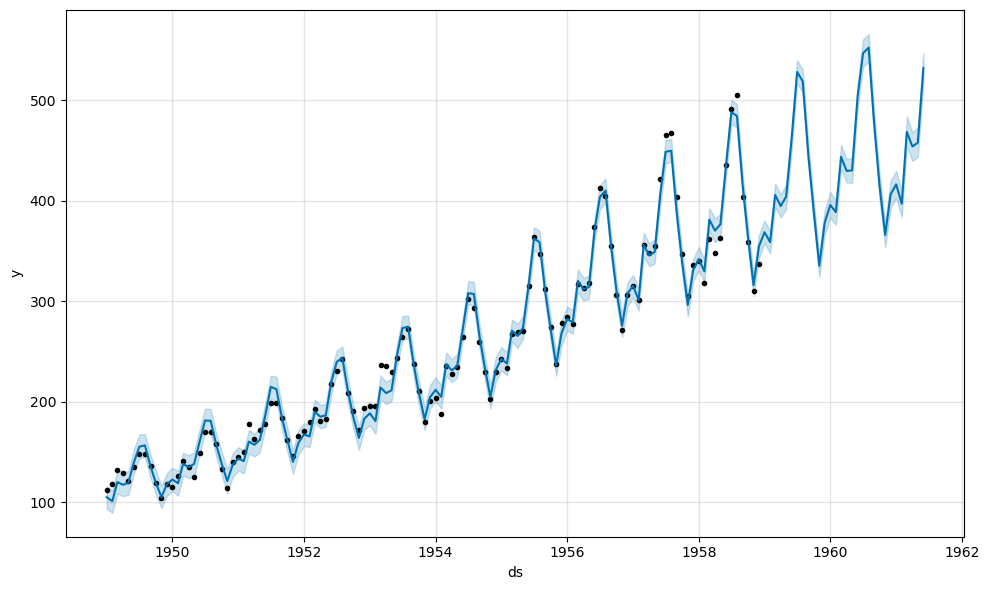

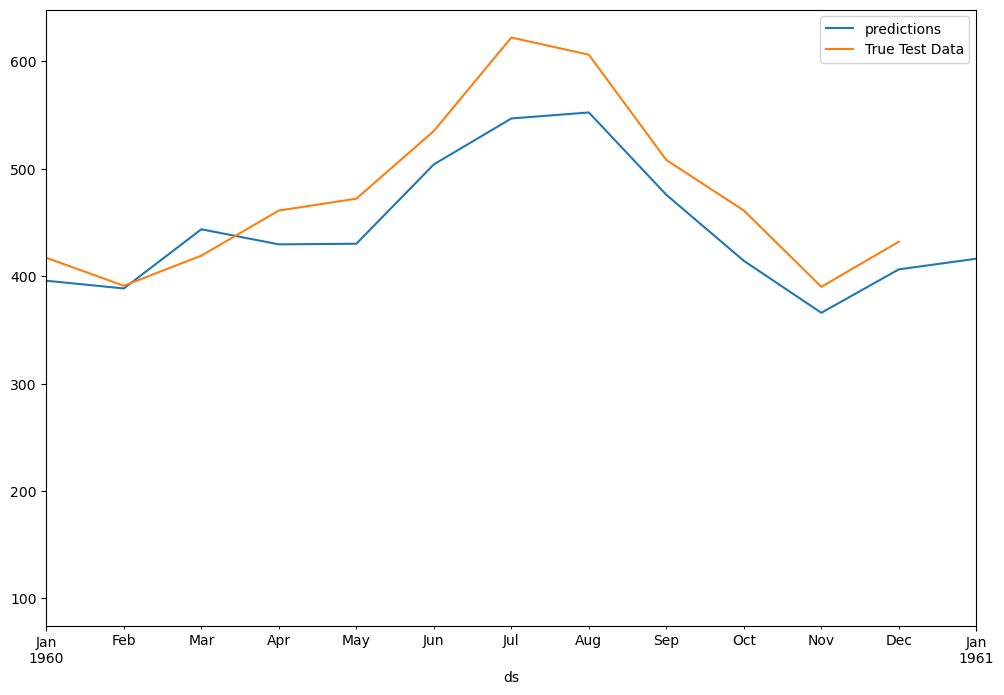

In [51]:
m.plot(forecast)
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
test.plot(x='ds',y='y',legend=True,label='True Test Data', ax=ax,xlim=('1960-01-01','1961-01-01'))

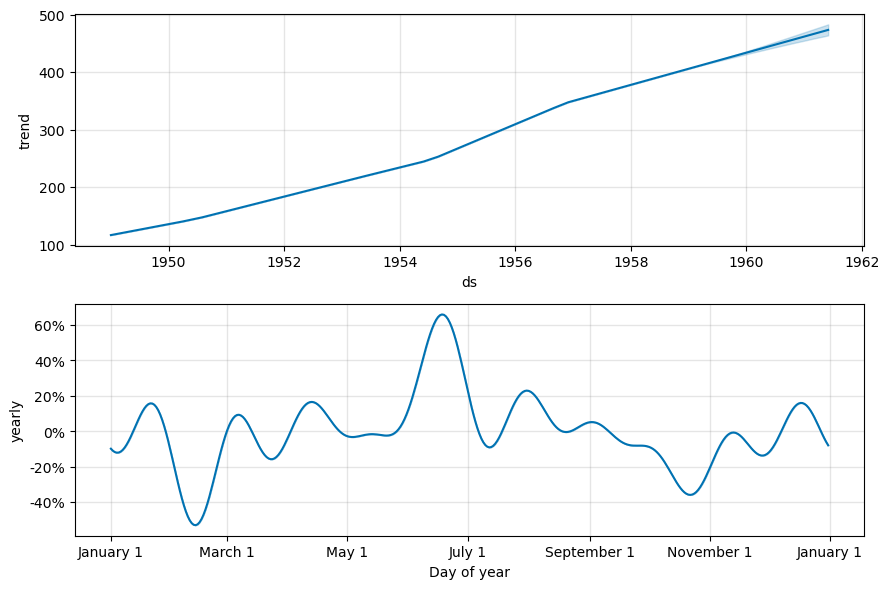

In [52]:
fig= m.plot_components(forecast)

       Since we are working with monthly data, Prophet will plot the trend and calculate the annual seasonality. 
       But if you're working with daily data, you'll see a weekly seasonal chart included. 

### Performance metrics:


The Prophet includes native diagnostic functionality to perform cross-validation, model run, and evaluation on multiple parts of the real data set. 

In [55]:
# Initial training period.
initial= 2*365
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period= 2*365
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 365
horizon=str(horizon)+' days'
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon)# Performance Metrics of fb_cv
performance_metrics(fb_cv)

INFO:fbprophet:Making 4 forecasts with cutoffs between 1951-12-03 00:00:00 and 1957-12-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]


Initial log joint probability = -47.3926
Iteration  1. Log joint probability =    32.0023. Improved by 79.3949.
Iteration  2. Log joint probability =    63.9849. Improved by 31.9826.
Iteration  3. Log joint probability =    86.9717. Improved by 22.9869.
Iteration  4. Log joint probability =    106.869. Improved by 19.8968.
Iteration  5. Log joint probability =    113.956. Improved by 7.08793.
Iteration  6. Log joint probability =    113.969. Improved by 0.0125345.
Iteration  7. Log joint probability =    114.166. Improved by 0.196788.
Iteration  8. Log joint probability =    114.188. Improved by 0.0224817.
Iteration  9. Log joint probability =    114.248. Improved by 0.0598148.
Iteration 10. Log joint probability =    114.392. Improved by 0.143901.
Iteration 11. Log joint probability =    123.058. Improved by 8.66591.
Iteration 12. Log joint probability =    125.551. Improved by 2.49355.
Iteration 13. Log joint probability =    127.129. Improved by 1.5776.
Iteration 14. Log joint prob


Initial log joint probability = -91.5755
Iteration  1. Log joint probability =    88.1001. Improved by 179.676.
Iteration  2. Log joint probability =    133.846. Improved by 45.7464.
Iteration  3. Log joint probability =    168.314. Improved by 34.4671.
Iteration  4. Log joint probability =    198.211. Improved by 29.8977.
Iteration  5. Log joint probability =     241.66. Improved by 43.4492.
Iteration  6. Log joint probability =     264.64. Improved by 22.9797.
Iteration  7. Log joint probability =    264.853. Improved by 0.212559.
Iteration  8. Log joint probability =    264.906. Improved by 0.0530402.
Iteration  9. Log joint probability =    265.181. Improved by 0.275262.
Iteration 10. Log joint probability =    266.822. Improved by 1.64084.
Iteration 11. Log joint probability =    266.868. Improved by 0.0457923.
Iteration 12. Log joint probability =    266.911. Improved by 0.043134.
Iteration 13. Log joint probability =    266.937. Improved by 0.026411.
Iteration 14. Log joint pro

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,161.157209,12.694771,9.250492,0.035487,0.030477,0.500
1,60 days,170.650717,13.063335,10.790715,0.044043,0.045411,0.250
2,61 days,512.274227,22.633476,18.001931,0.081842,0.045411,0.250
3,62 days,686.904465,26.208862,21.364741,0.093395,0.068518,0.250
4,89 days,675.906019,25.998193,23.058751,0.095962,0.108851,0.125
5,90 days,762.375489,27.611148,23.830872,0.082858,0.081387,0.000
6,120 days,845.807985,29.082778,26.723160,0.101965,0.111494,0.000
7,121 days,939.450044,30.650449,26.528802,0.102314,0.119600,0.250
8,150 days,715.350398,26.746035,19.898610,0.067373,0.049717,0.250
9,151 days,455.571085,21.344111,15.630218,0.053414,0.049717,0.250


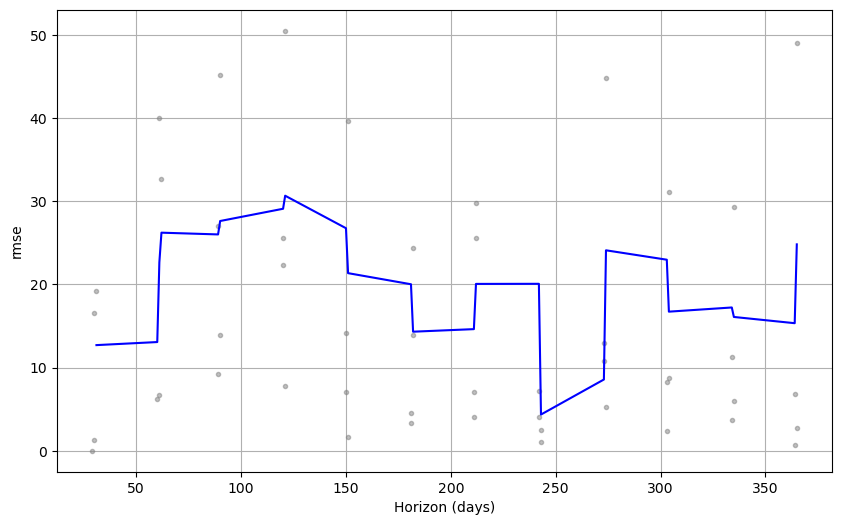

In [56]:
plot_cross_validation_metric(fb_cv,'rmse');

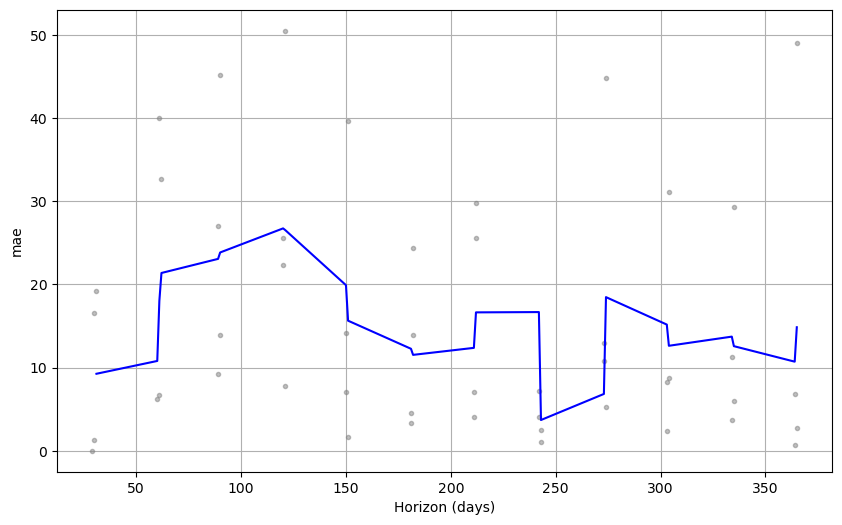

In [57]:
plot_cross_validation_metric(fb_cv,'mae');

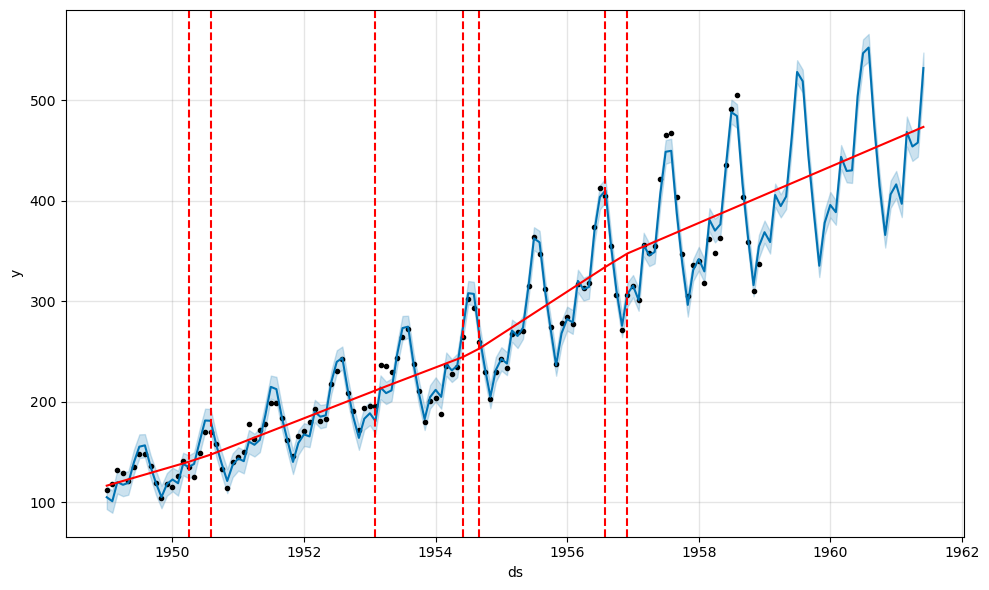

In [58]:
from fbprophet.plot import add_changepoints_to_plot

fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

           These red dotted line show the major points where trendline happens to change.